Build a model (ml), use train images in train folders to classify into 2 classes,ie. real and fake.
Then, test images stored in test folder..

In [1]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [20]:
path = "data/train/real/00001.jpg"

In [21]:
img = image.load_img(path, target_size = (224,224))

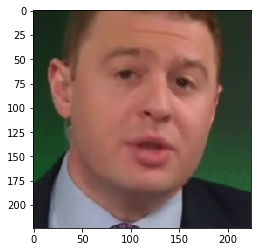

In [22]:
plt.imshow(img)

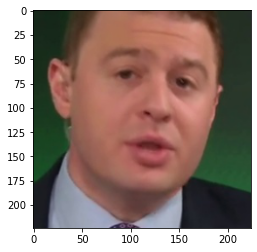

In [34]:
import cv2
import matplotlib.pyplot as plt
path = "data/train/real/00001.jpg"
imgg = cv2.imread(path)
imgg = cv2.resize(imgg,(224,224))
plt.imshow(cv2.cvtColor(imgg, cv2.COLOR_BGR2RGB))

In [1]:
import os
import shutil
import glob

In [2]:
train_dir = "./data/train"
CLASS = ['fake','real']

# Model building

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from keras.layers import Dense, Flatten
from keras.models import Model
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import keras

Using TensorFlow backend.


In [4]:
base_model = InceptionV3(input_shape=(256,256,3), include_top= False)

2021-12-15 01:20:07.982086: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2021-12-15 01:20:07.983732: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


In [5]:
for layer in base_model.layers:
    layer.trainable = False

In [6]:
x = Flatten()(base_model.output)
x = Dense(units=2, activation = 'sigmoid')(x)

#final model
model = Model(base_model.input, x)

# compile model
model.compile(optimizer = 'adam', loss = keras.losses.binary_crossentropy, metrics=['accuracy'])

# summary
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 127, 127, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 127, 127, 32) 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 127, 127, 32) 0           batch_normalization_1[0][0]      
____________________________________________________________________________________________

# preprocess data using data generators

In [7]:
train_datagen = ImageDataGenerator(featurewise_center=True, 
                                   rotation_range=0.4, 
                                   width_shift_range=0.3, 
                                   horizontal_flip=True, 
                                   preprocessing_function = preprocess_input,
                                   zoom_range = 0.4, 
                                   shear_range = 0.4)

train_data = train_datagen.flow_from_directory(directory = "./data/train", 
                                               target_size = (256,256), 
                                               batch_size= 36)

Found 18000 images belonging to 2 classes.


In [8]:
train_data.class_indices

{'fake': 0, 'real': 1}

# Visualizing data

In [9]:
t_img, label = train_data.next()

/opt/homebrew/Caskroom/miniconda/base/envs/iitwork/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


In [10]:
def plotImages(img_arr, label):
    """
    input = img array
    output = plot images
    """
    
    for idx, img in enumerate(img_arr):
        if idx <= 10:
            plt.figure(figsize = (5,5))
            plt.imshow(img)
            plt.title(img.shape)
            plt.axis = False
            plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


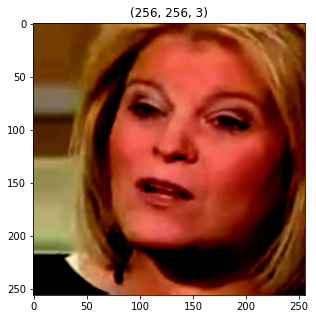

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


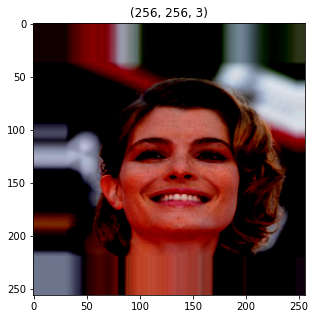

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


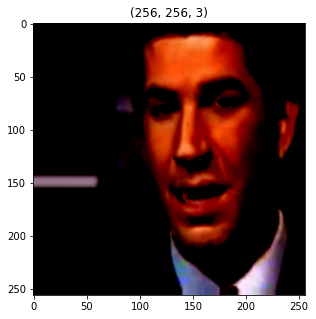

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


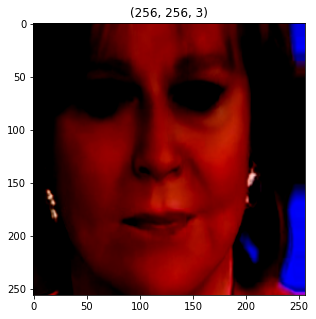

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


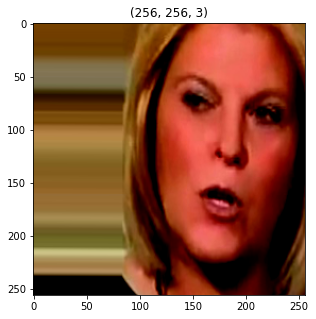

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


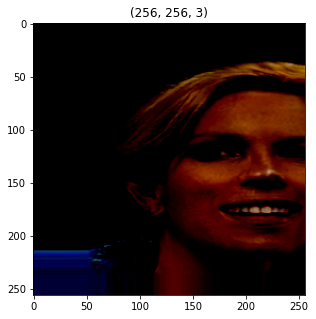

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


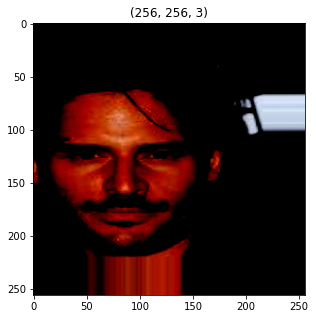

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


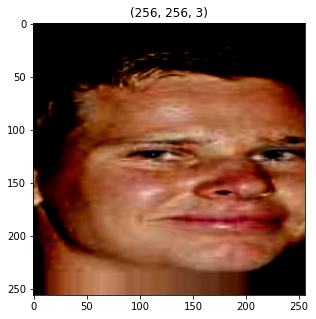

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


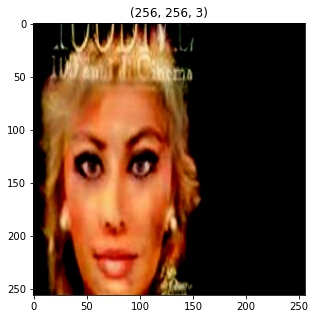

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


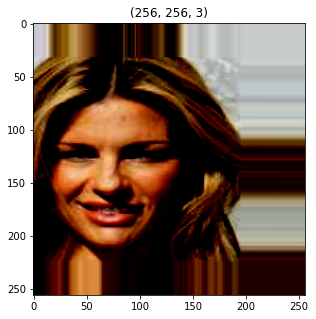

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


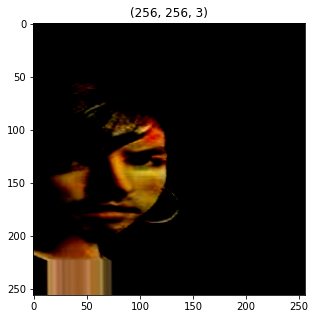

In [11]:
plotImages(t_img, label)

# Model checkpoint

In [12]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

mc = ModelCheckpoint(filepath = "./bestmodel.h5",
                     monitor = "accuracy", 
                     verbose = 1, 
                     save_best_only = True)
es = EarlyStopping(monitor = "accuracy",
                   min_delta = 0.01,
                   patience=5,
                   verbose=1)

cb = [mc,es]

In [13]:
his = model.fit_generator(train_data,
                          steps_per_epoch = 10,
                          epochs = 30, 
                          callbacks = cb)

Epoch 1/30
10/10 [==============================] - 118s 12s/step - loss: 4.4251 - accuracy: 0.5181

Epoch 00001: accuracy improved from -inf to 0.51806, saving model to ./bestmodel.h5
Epoch 2/30
10/10 [==============================] - 119s 12s/step - loss: 2.7133 - accuracy: 0.5375

Epoch 00002: accuracy improved from 0.51806 to 0.53750, saving model to ./bestmodel.h5
Epoch 3/30
10/10 [==============================] - 122s 12s/step - loss: 1.4952 - accuracy: 0.5778

Epoch 00003: accuracy improved from 0.53750 to 0.57778, saving model to ./bestmodel.h5
Epoch 4/30
10/10 [==============================] - 124s 12s/step - loss: 1.1859 - accuracy: 0.6056

Epoch 00004: accuracy improved from 0.57778 to 0.60556, saving model to ./bestmodel.h5
Epoch 5/30
10/10 [==============================] - 125s 12s/step - loss: 0.9556 - accuracy: 0.6125

Epoch 00005: accuracy improved from 0.60556 to 0.61250, saving model to ./bestmodel.h5
Epoch 6/30
10/10 [==============================] - 125s 13s/st

In [14]:
from keras.models import load_model

model = load_model("./bestmodel.h5")

In [15]:
h = his.history
h.keys()

dict_keys(['loss', 'accuracy'])

/opt/homebrew/Caskroom/miniconda/base/envs/iitwork/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go--" (-> color='g'). The keyword argument will take precedence.
  """Entry point for launching an IPython kernel.
/opt/homebrew/Caskroom/miniconda/base/envs/iitwork/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go--" (-> color='g'). The keyword argument will take precedence.
  


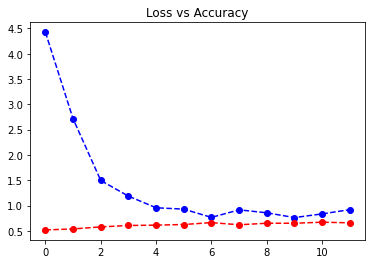

In [16]:
plt.plot(h['loss'],'go--', c = "blue")
plt.plot(h['accuracy'],'go--', c = "red")

plt.title("Loss vs Accuracy")
plt.show()

# Validate our model

In [17]:
df = pd.read_csv('./data/test.csv')
path = df['path']
predictions = []
for paths in path:
    img = load_img(paths, target_size=(256,256) )

    i = img_to_array(img)

    i = preprocess_input(i)

    input_arr = np.array([i])
    input_arr.shape

    pred = np.argmax(model.predict(input_arr))

    if pred == 0:
        predictions.append("fake")
    else:
        predictions.append("real")



In [18]:
path['label'] = predictions
#     # to display
#     plt.imshow(input_arr[0])
#     plt.axis = False
#     plt.show()

In [22]:
path = df['path']

In [28]:
dff = pd.DataFrame(path)
dff['label'] = predictions
dff.to_csv('submit.csv', index = False)

# GRAD-CAM-

In [46]:
# def get_img_arr(img_path):
#     """
#     input = image path
#     output = preprocessed image
#     """
    
#     img = load_img(path, target_size=(256,256) )

#     img = img_to_array(img)

#     img = preprocess_input(i)
# #     expand dimansion
#     img = np.array([i])
    
#     return img


In [47]:
# import tensorflow as tf

In [48]:
# def make_gracam_heatmap(img_arr, model, last_conv_layer_name, pred_index = None):
#     grad_model = tf.keras.models.Model([model.input],[model.get_layer(last_conv_layer_name).output, model.output])
    
#     with tf.GradientTape() as tape:
#         last_conv_layer_output, preds = grad_model(img_arr)
        
#         if pred_index is None:
#             pred_index = tf.argmax(preds[0])
            
#         class_channel = preds[:,pred_index]
        
#     grads = tape.gradient(class_channel, last_conv_layer_output)
    
#     pooles_grads = tf.reduce_mean(grads, axis = (0,1,2) )
    
#     last_conv_layer_output = last_conv_layer_output[0]
    
#     heatmap = last_conv_layer_output @ pooled_grads[...,tf.newaxis ]
    
#     heatmap = tf.squeeze(heatmap)
    
#     heatmap = tf.maximum(heatmap, 0)/tf.math.reduce_max(heatmap)
    
#     return heatmap.numpy()

# Mask heatmsap on an image

In [49]:
# import matplotlib.cm as cm
# from IPython.display import Image, display

In [50]:
# def save_and_display_gradcam(img_path,heatmap, cam_path = "cam.jpg", alpha = 0.4):
    
#     img = img_to_array(load_img(img_path))
    
#     heatmap = np.uint8(255*heatmap)
    
#     jet = cm.get_cmap("jet")
    
#     jet_colors = jet(np.arange(256))[:,:3]
#     jet_heatmap = jet_colors[heatmap]
    
#     jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
#     jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
#     jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)
    
#     superimposed_img = jet_heatmap * alpha + img
#     superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)
    
#     superimposed_img.save(cam_path)
    
#     display(Image(cam_path))
    